<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,54.091178,-4.837157,59.254021,61.780465,-2.526444
1,0.0,1.0,65.163634,59.954594,135.118228,74.728494,60.389734
2,0.0,2.0,76.046646,74.496106,160.542752,87.454988,73.087764
3,0.0,3.0,42.868132,-39.669841,13.198291,48.656338,-35.458047
4,0.0,4.0,69.162672,26.063755,105.226428,79.404932,25.821495
...,...,...,...,...,...,...,...
59995,999.0,55.0,97.381238,56.831783,164.213021,102.381927,61.831094
59996,999.0,56.0,56.111252,67.257232,133.368485,58.958932,74.409553
59997,999.0,57.0,65.825618,-63.884851,11.940767,69.180085,-57.239318
59998,999.0,58.0,28.964200,-33.033680,5.930520,30.395647,-24.465127


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    54.091178  -4.837157   59.254021   61.780465  -2.526444
      1.0    65.163634  59.954594  135.118228   74.728494  60.389734
      2.0    76.046646  74.496106  160.542752   87.454988  73.087764
      3.0    42.868132 -39.669841   13.198291   48.656338 -35.458047
      4.0    69.162672  26.063755  105.226428   79.404932  25.821495
...                ...        ...         ...         ...        ...
999.0 55.0   97.381238  56.831783  164.213021  102.381927  61.831094
      56.0   56.111252  67.257232  133.368485   58.958932  74.409553
      57.0   65.825618 -63.884851   11.940767   69.180085 -57.239318
      58.0   28.964200 -33.033680    5.930520   30.395647 -24.465127
      59.0   35.092039  -5.901181   39.190858   36.843169   2.347689

[60000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    54.091178  -4.837157   59.254021   61.780465  -2.526444
      1.0    65.163634  59.954594  135.118228   74.728494  60.389734
      2.0    76.046646  74.496106  160.542752   87.454988  73.087764
      3.0    42.868132 -39.669841   13.198291   48.656338 -35.458047
      4.0    69.162672  26.063755  105.226428   79.404932  25.821495
...                ...        ...         ...         ...        ...
999.0 55.0   97.381238  56.831783  164.213021  102.381927  61.831094
      56.0   56.111252  67.257232  133.368485   58.958932  74.409553
      57.0   65.825618 -63.884851   11.940767   69.180085 -57.239318
      58.0   28.964200 -33.033680    5.930520   30.395647 -24.465127
      59.0   35.092039  -5.901181   39.190858   36.843169   2.347689

[60000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,54.091178,-4.837157,59.254021,61.780465,-2.526444
1,0.0,1.0,65.163634,59.954594,135.118228,74.728494,60.389734
2,0.0,2.0,76.046646,74.496106,160.542752,87.454988,73.087764
3,0.0,3.0,42.868132,-39.669841,13.198291,48.656338,-35.458047
4,0.0,4.0,69.162672,26.063755,105.226428,79.404932,25.821495
...,...,...,...,...,...,...,...
59995,999.0,55.0,97.381238,56.831783,164.213021,102.381927,61.831094
59996,999.0,56.0,56.111252,67.257232,133.368485,58.958932,74.409553
59997,999.0,57.0,65.825618,-63.884851,11.940767,69.180085,-57.239318
59998,999.0,58.0,28.964200,-33.033680,5.930520,30.395647,-24.465127


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    54.091178  -4.837157   59.254021   61.780465  -2.526444
      1.0    65.163634  59.954594  135.118228   74.728494  60.389734
      2.0    76.046646  74.496106  160.542752   87.454988  73.087764
      3.0    42.868132 -39.669841   13.198291   48.656338 -35.458047
      4.0    69.162672  26.063755  105.226428   79.404932  25.821495
...                ...        ...         ...         ...        ...
999.0 55.0   97.381238  56.831783  164.213021  102.381927  61.831094
      56.0   56.111252  67.257232  133.368485   58.958932  74.409553
      57.0   65.825618 -63.884851   11.940767   69.180085 -57.239318
      58.0   28.964200 -33.033680    5.930520   30.395647 -24.465127
      59.0   35.092039  -5.901181   39.190858   36.843169   2.347689

[60000 rows x 5 columns]

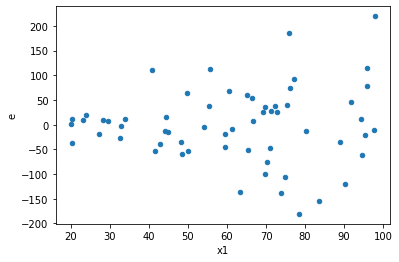

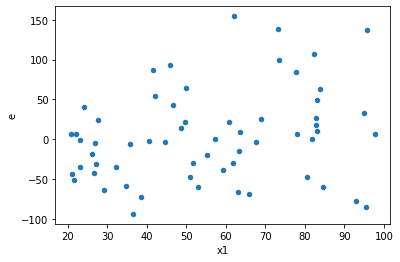

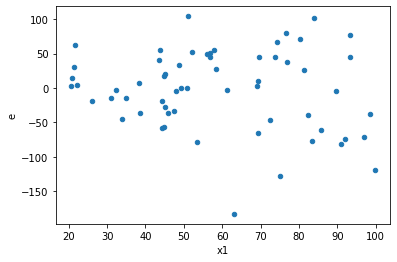

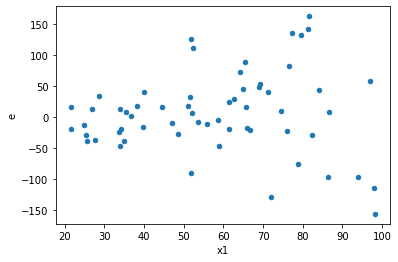

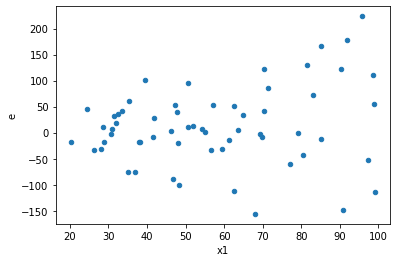

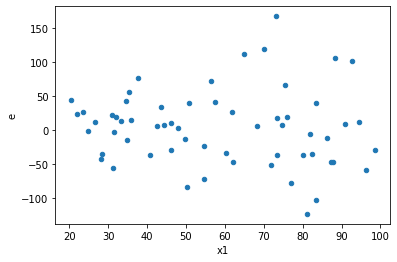

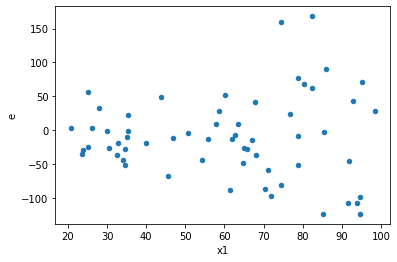

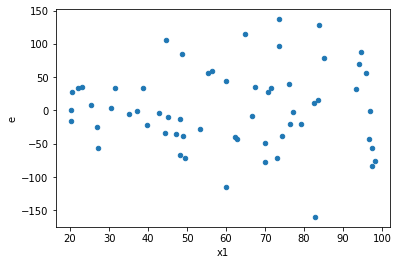

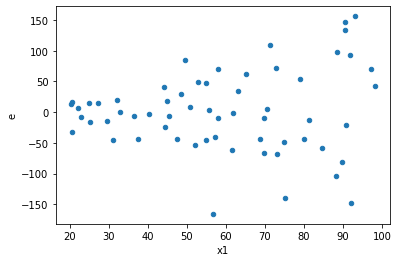

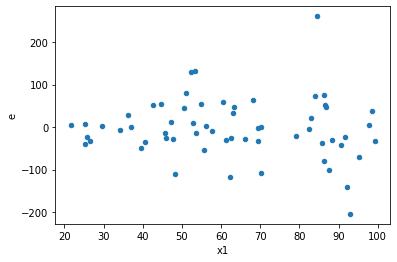

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
9.0,33.0,25.0,96296.24472082793,185040.19696640212,2918.068021843271,7401.607878656085,2.536475443084659,0.018574439145339516,0.9907127804273302,0.009287219572669758,Reject001=1 : Homoscedasticity
12.0,30.0,28.0,37190.44623200777,117890.1858979038,1239.6815410669258,4210.363782067992,3.3963269134784113,0.0016640932804106168,0.9991679533597947,0.0008320466402053084,Reject001=0 : Heteroscedasticity
13.0,29.0,29.0,28574.470712593426,294591.33481352637,985.326576296325,10158.321890121599,10.309599004530053,1.3091141948251561e-08,0.999999993454429,6.545570974125781e-09,Reject001=0 : Heteroscedasticity
14.0,21.0,37.0,16507.549732717845,283901.54302395025,786.0737967960879,7673.0146763229795,9.761188717391382,3.5841460910290834e-09,0.999999998207927,1.7920730455145417e-09,Reject001=0 : Heteroscedasticity
15.0,31.0,27.0,71916.92819490006,145716.3225495802,2319.900909512905,5396.900835169637,2.326349721679617,0.028689027614293705,0.9856554861928531,0.014344513807146853,Reject001=1 : Homoscedasticity
16.0,27.0,31.0,59820.3667184064,154644.8131255968,2215.569137718756,4988.542358890219,2.2515850550376566,0.030688532379385736,0.9846557338103071,0.015344266189692868,Reject001=1 : Homoscedasticity
17.0,35.0,23.0,70775.67031541796,190781.68285795953,2022.1620090119416,8294.855776433023,4.101973896980694,0.0007287255350092448,0.9996356372324954,0.0003643627675046224,Reject001=0 : Heteroscedasticity
19.0,22.0,36.0,33943.55733903179,246510.10514518744,1542.8889699559904,6847.502920699651,4.438104785268489,7.816875146726687e-05,0.9999609156242664,3.9084375733633436e-05,Reject001=0 : Heteroscedasticity
21.0,28.0,30.0,46833.84875849493,311182.349160605,1672.6374556605333,10372.744972020166,6.201430523343096,3.6538679817343933e-06,0.9999981730660091,1.8269339908671967e-06,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,35.0,23.0,276104.603138254,45635.52817801825,7888.702946807258,1984.1533990442717,0.2515183310137575,0.0002490189538436337,Reject001=0 : Heteroscedasticity
1.0,28.0,30.0,122015.98810573413,62298.8027739062,4357.713860919076,2076.6267591302067,0.47654041210779036,0.05196922810632413,Reject001=1 : Homoscedasticity
2.0,24.0,34.0,134310.74080282188,53871.03472444956,5596.280866784245,1584.4421977779282,0.28312413824368793,0.0019702568315236382,Reject001=0 : Heteroscedasticity
3.0,30.0,28.0,186122.82083542953,47978.48357760001,6204.094027847651,1713.5172706285719,0.27619137668405586,0.0008020608327675373,Reject001=0 : Heteroscedasticity
4.0,25.0,33.0,239375.0859028757,73340.68688445604,9575.003436115028,2222.445057104728,0.23210906104974363,0.00033557596762783795,Reject001=0 : Heteroscedasticity
5.0,28.0,30.0,131312.90699202273,45513.640031074414,4689.746678286526,1517.1213343691472,0.3234975017719831,0.0035560318336361227,Reject001=0 : Heteroscedasticity
6.0,36.0,22.0,195585.88444391068,20491.145748224684,5432.9412345530745,931.4157158283947,0.1714385773040696,3.495486445359378e-06,Reject001=0 : Heteroscedasticity
7.0,32.0,26.0,163417.4863284908,49625.78251405321,5106.796447765338,1908.6839428482003,0.3737536755911651,0.00882950951135763,Reject001=0 : Heteroscedasticity
8.0,27.0,31.0,185424.851029803,62734.937572480005,6867.587075177888,2023.7076636283873,0.2946752100083082,0.0018535337690323266,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    805
Reject001=1 : Homoscedasticity      195
Name: Result_test, dtype: int64